In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mugs-normalised/mugs_normalized/mug4.obj
/kaggle/input/mugs-normalised/mugs_normalized/material_0.png
/kaggle/input/mugs-normalised/mugs_normalized/mug3.obj
/kaggle/input/mugs-normalised/mugs_normalized/mug7.obj
/kaggle/input/mugs-normalised/mugs_normalized/mug1.obj
/kaggle/input/mugs-normalised/mugs_normalized/mug6.obj
/kaggle/input/mugs-normalised/mugs_normalized/mug2.obj
/kaggle/input/mugs-normalised/mugs_normalized/mug8.obj
/kaggle/input/mugs-normalised/mugs_normalized/mug5.obj
/kaggle/input/mugs-normalised/mugs_normalized/material.mtl
/kaggle/input/mugs-normalised/mugs_normalized/mug9.obj


In [3]:
!pip install trimesh


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.0/737.0 kB 16.5 MB/s eta 0:00:0000:01


In [5]:
import os

DATA_DIR = "/kaggle/input/mugs-normalised/mugs_normalized"
print(os.listdir(DATA_DIR))


['mug4.obj', 'material_0.png', 'mug3.obj', 'mug7.obj', 'mug1.obj', 'mug6.obj', 'mug2.obj', 'mug8.obj', 'mug5.obj', 'material.mtl', 'mug9.obj']


In [6]:
import trimesh

mesh = trimesh.load(f"{DATA_DIR}/mug1.obj")
mesh.show()


In [15]:
import numpy as np

# I am sampling points in the bounding box of the mesh
bounds = mesh.bounds
points = np.random.uniform(
    low=bounds[0],
    high=bounds[1],
    size=(50000, 3)
)

points.shape


(50000, 3)

In [16]:
sdf = trimesh.proximity.signed_distance(mesh, points)

sdf.shape


(50000,)

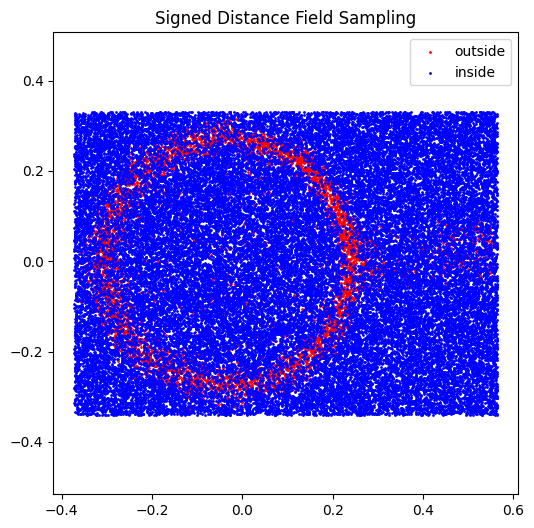

In [17]:
import matplotlib.pyplot as plt

inside = sdf < 0
outside = sdf > 0

plt.figure(figsize=(6,6))
plt.scatter(points[outside][:,0], points[outside][:,1],
            s=1, c='red', label='outside')
plt.scatter(points[inside][:,0], points[inside][:,1],
            s=1, c='blue', label='inside')

plt.legend()
plt.axis('equal')
plt.title("Signed Distance Field Sampling")
plt.show()


In [19]:
import os
import pickle

DATA_DIR = "/kaggle/input/mugs-normalised/mugs_normalized"

all_sdf = {}

for fname in os.listdir(DATA_DIR):
    if not fname.endswith(".obj"):
        continue   

    mesh = trimesh.load(os.path.join(DATA_DIR, fname))
    pts = np.random.uniform(mesh.bounds[0], mesh.bounds[1], (30000, 3))
    sdf_vals = trimesh.proximity.signed_distance(mesh, pts)

    all_sdf[fname] = {
        "points": pts,
        "sdf": sdf_vals
    }

print("Processed objects:", len(all_sdf))


/usr/local/lib/python3.11/dist-packages/trimesh/triangles.py:656: RuntimeWarning: divide by zero encountered in divide
  v = (d1[is_ab] / (d1[is_ab] - d3[is_ab])).reshape((-1, 1))
/usr/local/lib/python3.11/dist-packages/trimesh/triangles.py:656: RuntimeWarning: invalid value encountered in divide
  v = (d1[is_ab] / (d1[is_ab] - d3[is_ab])).reshape((-1, 1))


Processed objects: 9


In [20]:
with open("all_mugs_sdf.pkl", "wb") as f:
    pickle.dump(all_sdf, f)